# WWZ Production

## After Detector Analysis

### Importing Libaries

In [1]:
import matplotlib 
import uproot
import vector
import matplotlib.pyplot as plt
import numpy as np
import json
import pandas as pd
import uproot
import matplotlib.pyplot as plt
import vector
import awkward as ak

### Importing Data

In [2]:
file_path = r'C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week3\output_WWZ.root'
tree = uproot.open(f"{file_path}:Delphes")

All_Muon_events = tree.arrays(['Event.Weight', 'Muon_size', 'Muon.PT', 'Muon.Eta', 'Muon.Phi'])
All_muons = vector.zip({'pt':All_Muon_events['Muon.PT'],'eta':All_Muon_events['Muon.Eta'],'phi':All_Muon_events['Muon.Phi'],'mass':0.10566})
muon_transverse_momenta_after = np.concatenate([pt for pt in All_Muon_events['Muon.PT']])
muon_phi_after = np.concatenate([pt for pt in All_Muon_events['Muon.Phi']])
muon_eta_after = np.concatenate([pt for pt in All_Muon_events['Muon.Eta']])

All_Electron_events = tree.arrays(['Event.Weight', 'Electron_size', 'Electron.PT', 'Electron.Eta', 'Electron.Phi'])
All_Electrons = vector.zip({'pt':All_Electron_events['Electron.PT'],'eta':All_Electron_events['Electron.Eta'],'phi':All_Electron_events['Electron.Phi'],'mass':0.10566})
electron_transverse_momenta_after = np.concatenate([pt for pt in All_Electron_events['Electron.PT']])
electron_phi_after = np.concatenate([pt for pt in All_Electron_events['Electron.Phi']])
electron_eta_after = np.concatenate([pt for pt in All_Electron_events['Electron.Eta']])

## Transverse Momenta Analysis

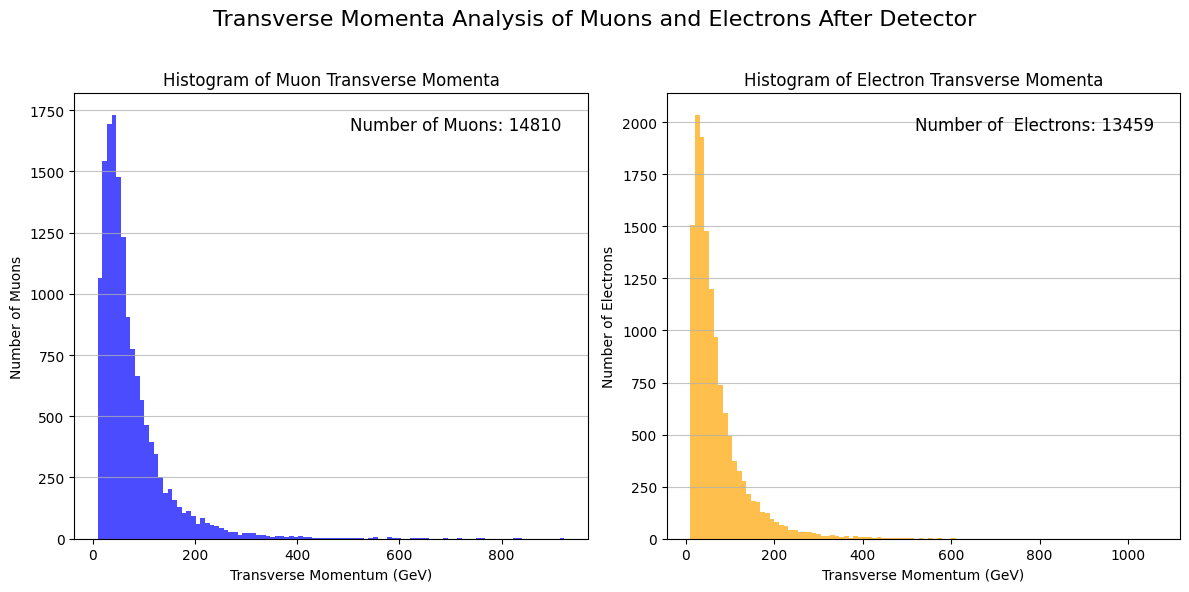

In [32]:

num_muon_events = len(muon_transverse_momenta_after)
num_electron_events = len(electron_transverse_momenta_after)

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

plt.suptitle('Transverse Momenta Analysis of Muons and Electrons After Detector', fontsize=16)

axs[0].hist(muon_transverse_momenta_after, bins=100, alpha=0.7, color='blue')
axs[0].set_xlabel('Transverse Momentum (GeV)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Histogram of Muon Transverse Momenta')
axs[0].grid(axis='y', alpha=0.75)

axs[0].text(0.95, 0.95, f'Number of Muons: {num_muon_events}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

axs[1].hist(electron_transverse_momenta_after, bins=100, alpha=0.7, color='orange')
axs[1].set_xlabel('Transverse Momentum (GeV)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Histogram of Electron Transverse Momenta')
axs[1].grid(axis='y', alpha=0.75)

axs[1].text(0.95, 0.95, f'Number of  Electrons: {num_electron_events}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


### Importing Data from before detector

In [4]:
with open('muon_transverse_momenta.json', 'r') as f:
    muon_transverse_momenta_before = json.load(f)
with open('muon_eta.json', 'r') as f:
    muon_eta_before = json.load(f)
with open('muon_phi.json', 'r') as f:
    muon_phi_before = json.load(f)



with open('electron_transverse_momenta.json', 'r') as f:
    electron_transverse_momenta_before = json.load(f)
with open('electron_eta.json', 'r') as f:
    electron_eta_before = json.load(f)
with open('electron_phi.json', 'r') as f:
    electron_phi_before = json.load(f)

## Comparing Data from pre and post detector

### Muons

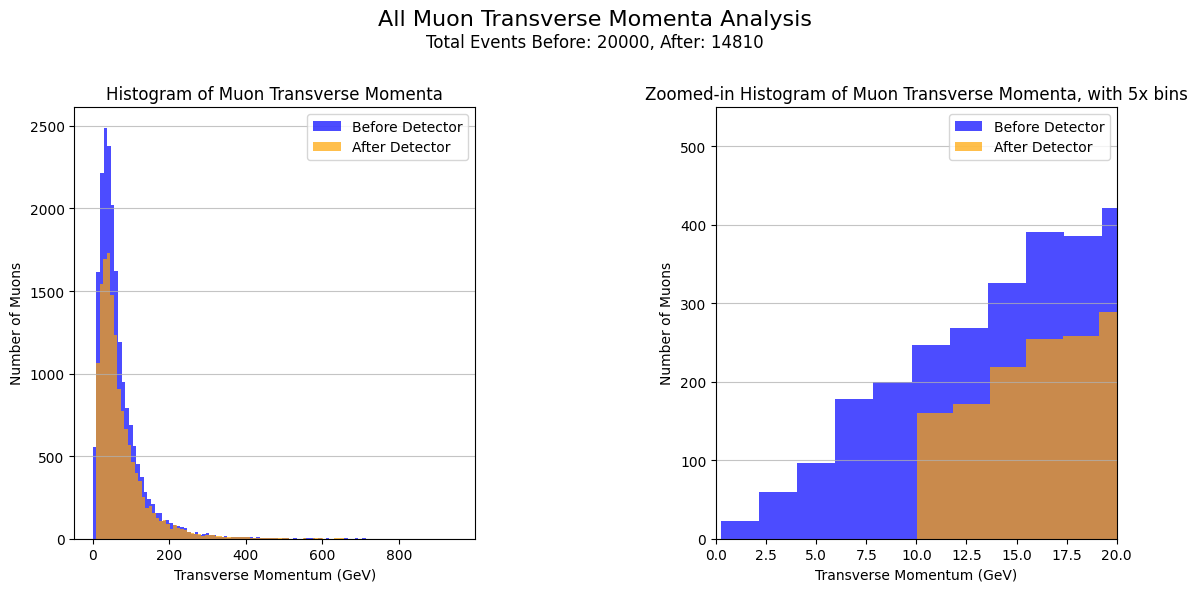

In [33]:
# Calculate total number of events
num_events_before = len(muon_transverse_momenta_before)
num_events_after = len(muon_transverse_momenta_after)

# Create subplots
fig, axs = plt.subplots(1,2 , figsize=(12, 6))  # Two rows, one column

# Overall title for the figure
plt.suptitle('All Muon Transverse Momenta Analysis', fontsize=16)

# Add total number of events under the main title
plt.text(0.5, 0.94, f'Total Events Before: {num_events_before}, After: {num_events_after}', 
         ha='center', va='top', fontsize=12, transform=fig.transFigure)

# Full histogram
axs[0].hist(muon_transverse_momenta_before, bins=100, alpha=0.7, label='Before Detector', color='blue')
axs[0].hist(muon_transverse_momenta_after, bins=100, alpha=0.7, label='After Detector', color='orange')
axs[0].set_xlabel('Transverse Momentum (GeV)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title(f'Histogram of Muon Transverse Momenta')
axs[0].grid(axis='y', alpha=0.75)
axs[0].legend()

# Zoomed-in histogram
axs[1].hist(muon_transverse_momenta_before, bins=500, alpha=0.7, label='Before Detector', color='blue')
axs[1].hist(muon_transverse_momenta_after, bins=500, alpha=0.7, label='After Detector', color='orange')
axs[1].set_xlim(0, 20)  # Adjust x-axis limits for zoom
axs[1].set_xlabel('Transverse Momentum (GeV)')
axs[1].set_ylabel('Number of Muons')
axs[1].set_title('Zoomed-in Histogram of Muon Transverse Momenta, with 5x bins')
axs[1].grid(axis='y', alpha=0.75)
axs[1].legend()

# Show the plot
plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\muon_momenta_analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()



## Electrons

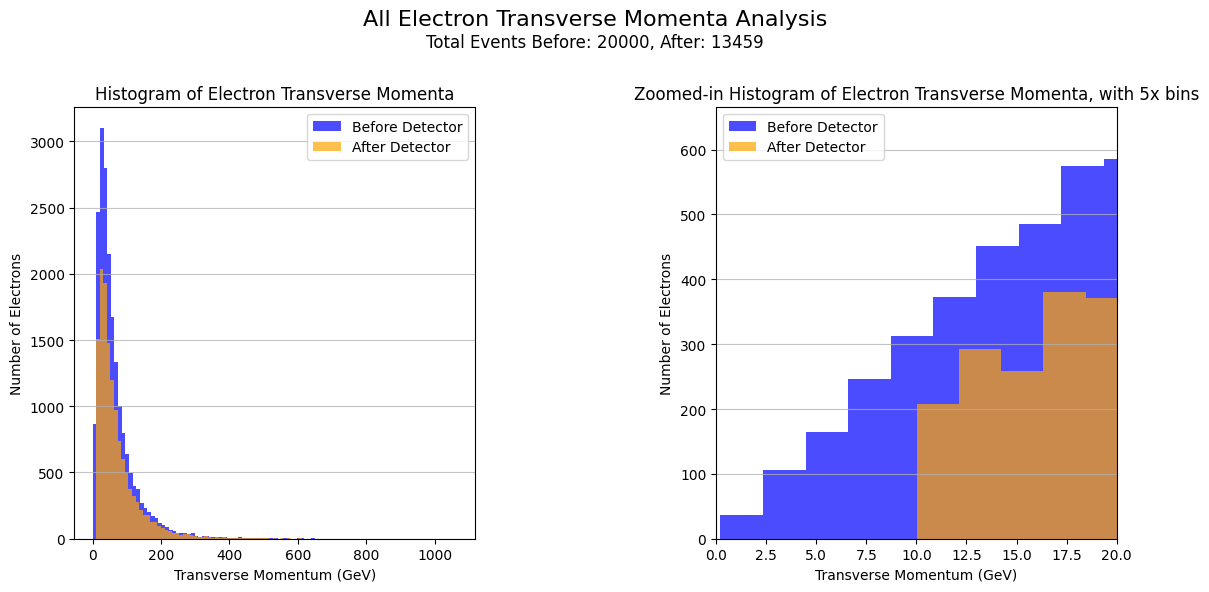

In [34]:
# Calculate total number of events
num_events_before = len(electron_transverse_momenta_before)
num_events_after = len(electron_transverse_momenta_after)

# Create subplots
fig, axs = plt.subplots(1,2 , figsize=(12, 6))  # Two rows, one column

# Overall title for the figure
plt.suptitle('All Electron Transverse Momenta Analysis', fontsize=16)

# Add total number of events under the main title
plt.text(0.5, 0.94, f'Total Events Before: {num_events_before}, After: {num_events_after}', 
         ha='center', va='top', fontsize=12, transform=fig.transFigure)

# Full histogram
axs[0].hist(electron_transverse_momenta_before, bins=100, alpha=0.7, label='Before Detector', color='blue')
axs[0].hist(electron_transverse_momenta_after, bins=100, alpha=0.7, label='After Detector', color='orange')
axs[0].set_xlabel('Transverse Momentum (GeV)')
axs[0].set_ylabel('Number of Electrons')
axs[0].set_title(f'Histogram of Electron Transverse Momenta')
axs[0].grid(axis='y', alpha=0.75)
axs[0].legend()

# Zoomed-in histogram
axs[1].hist(electron_transverse_momenta_before, bins=500, alpha=0.7, label='Before Detector', color='blue')
axs[1].hist(electron_transverse_momenta_after, bins=500, alpha=0.7, label='After Detector', color='orange')
axs[1].set_xlim(0, 20)  # Adjust x-axis limits for zoom
axs[1].set_xlabel('Transverse Momentum (GeV)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Zoomed-in Histogram of Electron Transverse Momenta, with 5x bins')
axs[1].grid(axis='y', alpha=0.75)
axs[1].legend()

# Show the plot
# Show the plot
plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\electron_momenta_analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()



## Pseudorapidity 

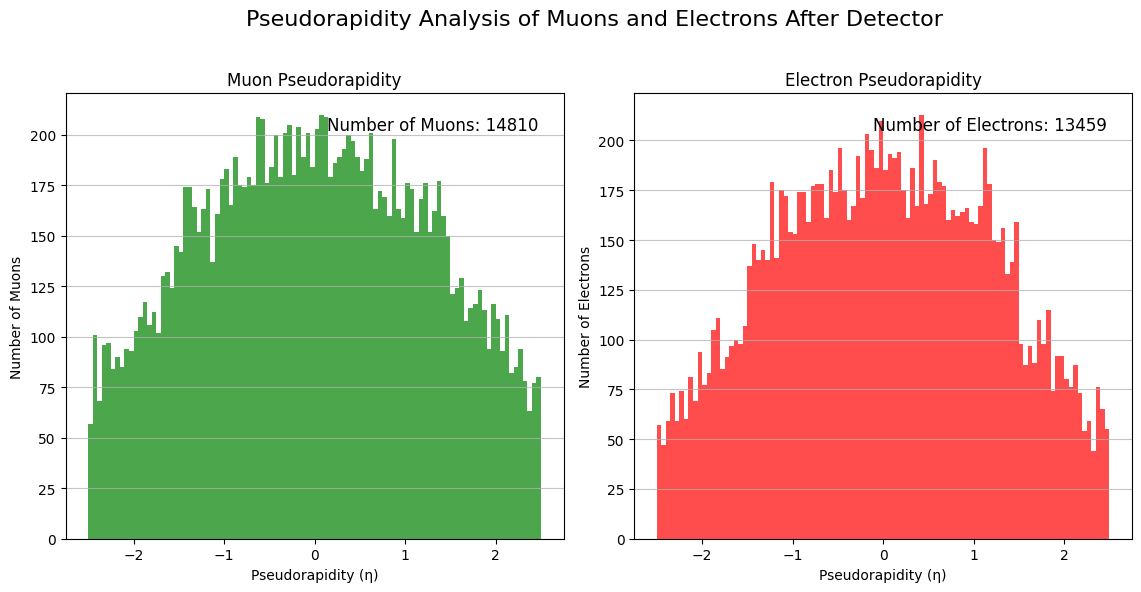

In [14]:
# Create subplots: 1 row, 2 columns (for pseudorapidity histograms)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Overall title
plt.suptitle('Pseudorapidity Analysis of Muons and Electrons After Detector', fontsize=16)

# --- Muon Pseudorapidity Histogram ---
axs[0].hist(muon_eta_after, bins=100, alpha=0.7, color='green')
axs[0].set_xlabel('Pseudorapidity (η)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Pseudorapidity')
axs[0].grid(axis='y', alpha=0.75)

# Add text with the number of muons
num_muons = len(muon_eta_after)
axs[0].text(0.95, 0.95, f'Number of Muons: {num_muons}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Pseudorapidity Histogram ---
axs[1].hist(electron_eta_after, bins=100, alpha=0.7, color='red')
axs[1].set_xlabel('Pseudorapidity (η)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Pseudorapidity')
axs[1].grid(axis='y', alpha=0.75)

# Add text with the number of electrons
num_electrons = len(electron_eta_after)
axs[1].text(0.95, 0.95, f'Number of Electrons: {num_electrons}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

# Show the plot
plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\psuedorapididty_analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()


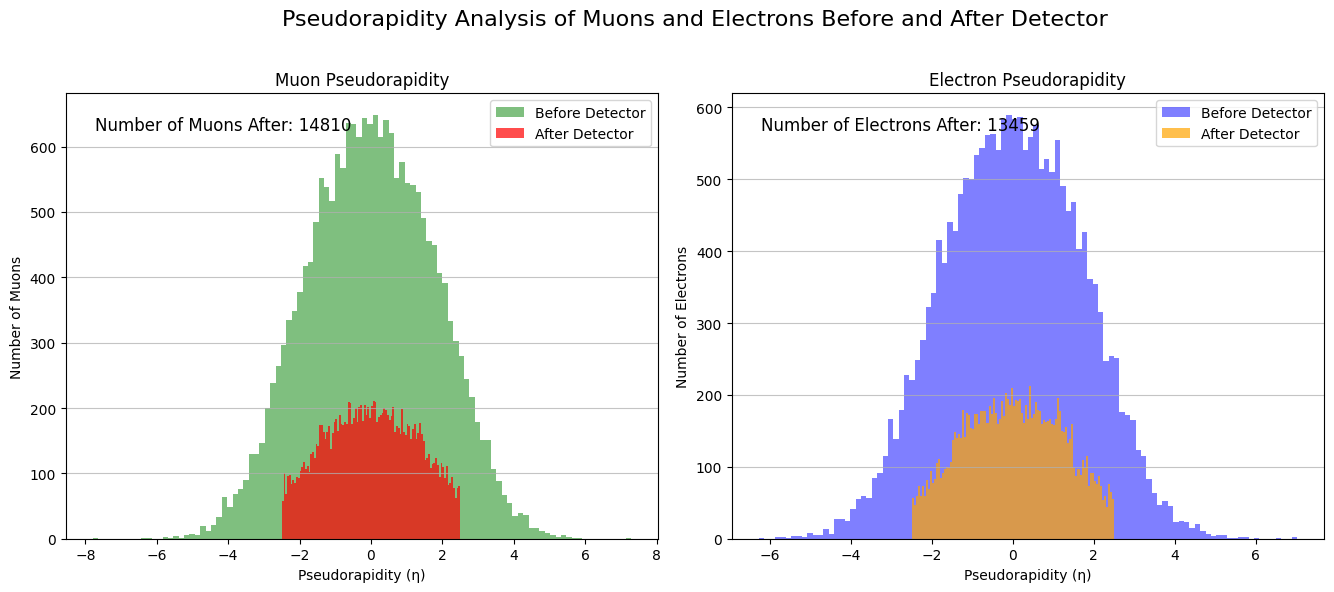

In [29]:
# Create subplots: 1 row, 2 columns (for pseudorapidity histograms)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Overall title
plt.suptitle('Pseudorapidity Analysis of Muons and Electrons Before and After Detector', fontsize=16)

# --- Muon Pseudorapidity Histogram ---
axs[0].hist(muon_eta_before, bins=100, alpha=0.5, color='green', label='Before Detector')
axs[0].hist(muon_eta_after, bins=100, alpha=0.7, color='red', label='After Detector')
axs[0].set_xlabel('Pseudorapidity (η)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Pseudorapidity')
axs[0].grid(axis='y', alpha=0.75)

# Add legend and text with the number of muons
axs[0].legend(loc='upper right')
num_muons = len(muon_eta_after)
axs[0].text(0.05, 0.95, f'Number of Muons After: {num_muons}', 
            ha='left', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Pseudorapidity Histogram ---
axs[1].hist(electron_eta_before, bins=100, alpha=0.5, color='blue', label='Before Detector')
axs[1].hist(electron_eta_after, bins=100, alpha=0.7, color='orange', label='After Detector')
axs[1].set_xlabel('Pseudorapidity (η)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Pseudorapidity')
axs[1].grid(axis='y', alpha=0.75)

# Add legend and text with the number of electrons
axs[1].legend(loc='upper right')
num_electrons = len(electron_eta_after)
axs[1].text(0.05, 0.95, f'Number of Electrons After: {num_electrons}', 
            ha='left', va='top', fontsize=12, transform=axs[1].transAxes)

# Show the plot
plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\muon_electron_pseudorapidity.png"
plt.savefig(save_path, dpi=300) 
plt.show()


## Phi

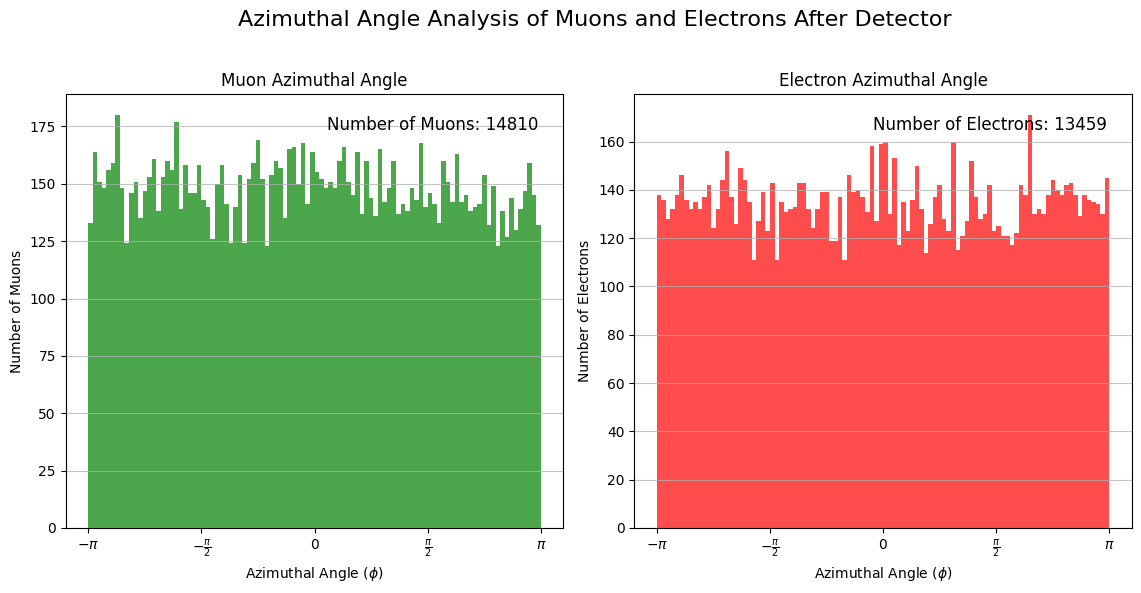

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Create subplots: 1 row, 2 columns (for Azimuthal Angle histograms)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Overall title
plt.suptitle('Azimuthal Angle Analysis of Muons and Electrons After Detector', fontsize=16)

pi_vals = np.arange(-np.pi, np.pi + 0.1, np.pi / 2)  # 0, π/2, π, 3π/2, 2π
pi_labels = [r'$-\pi$', r'$-\frac{\pi}{2}$', r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']

# --- Muon Azimuthal Angle Histogram ---
axs[0].hist(muon_phi_after, bins=100, alpha=0.7, color='green')
axs[0].set_xlabel(r'Azimuthal Angle ($\phi$)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Azimuthal Angle')
axs[0].grid(axis='y', alpha=0.75)
axs[0].set_xticks(pi_vals)
axs[0].set_xticklabels(pi_labels)

# Add text with the number of muons
num_muons = len(muon_phi_after)
axs[0].text(0.95, 0.95, f'Number of Muons: {num_muons}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Azimuthal Angle Histogram ---
axs[1].hist(electron_phi_after, bins=100, alpha=0.7, color='red')
axs[1].set_xlabel(r'Azimuthal Angle ($\phi$)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Azimuthal Angle')
axs[1].grid(axis='y', alpha=0.75)
axs[1].set_xticks(pi_vals)
axs[1].set_xticklabels(pi_labels)

# Add text with the number of electrons
num_electrons = len(electron_phi_after)
axs[1].text(0.95, 0.95, f'Number of Electrons: {num_electrons}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

# Adjust layout to make room for the overall title
plt.tight_layout(rect=[0, 0, 0.96, 0.96])

# Save the figure
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\phi_analysis.png"
plt.savefig(save_path, dpi=300)

# Show the plot
plt.show()


In [21]:
eta_1_after = np.array(muon_eta_after)
muon_theta_after = 2 * np.arctan(np.exp(-eta_1_after))

eta_2_after = np.array(electron_eta_after)
electron_theta_after = 2 * np.arctan(np.exp(-eta_2_after))

eta_1_before = np.array(muon_eta_before)
muon_theta_before = 2 * np.arctan(np.exp(-eta_1_before))

eta_2_before = np.array(electron_eta_before)
electron_theta_before = 2 * np.arctan(np.exp(-eta_2_before))


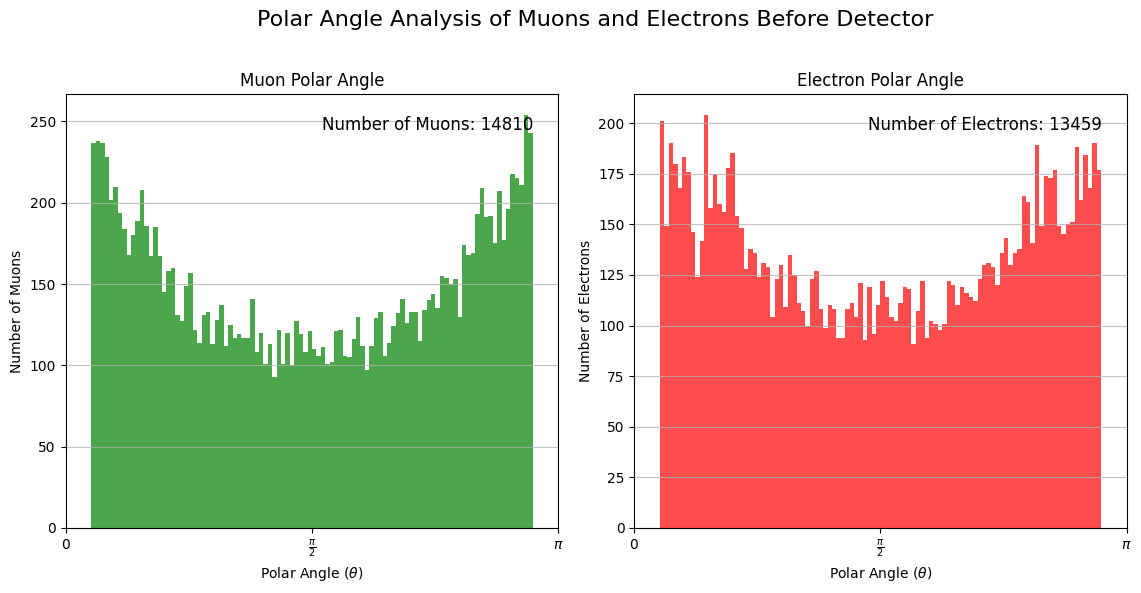

In [42]:
# Create subplots: 1 row, 2 columns (for Polar Angle histograms)
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Overall title
plt.suptitle('Polar Angle Analysis of Muons and Electrons Before Detector', fontsize=16)

pi_vals = np.arange(0, np.pi + 0.1, np.pi / 2)
pi_labels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']

# --- Muon Polar Angle Histogram ---
axs[0].hist(muon_theta_after, bins=100, alpha=0.7, color='green')
axs[0].set_xlabel(r'Polar Angle ($\theta$)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Polar Angle')
axs[0].grid(axis='y', alpha=0.75)
axs[0].set_xticks(pi_vals)
axs[0].set_xticklabels(pi_labels)
# Add text with the number of muons
num_muons = len(muon_theta_after)
axs[0].text(0.95, 0.95, f'Number of Muons: {num_muons}', 
            ha='right', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Polar Angle Histogram ---
axs[1].hist(electron_theta_after, bins=100, alpha=0.7, color='red')
axs[1].set_xlabel(r'Polar Angle ($\theta$)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Polar Angle')
axs[1].grid(axis='y', alpha=0.75)
axs[1].set_xticks(pi_vals)
axs[1].set_xticklabels(pi_labels)
# Add text with the number of electrons
num_electrons = len(electron_theta_after)
axs[1].text(0.95, 0.95, f'Number of Electrons: {num_electrons}', 
            ha='right', va='top', fontsize=12, transform=axs[1].transAxes)

# Show the plot
plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\theta_analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()


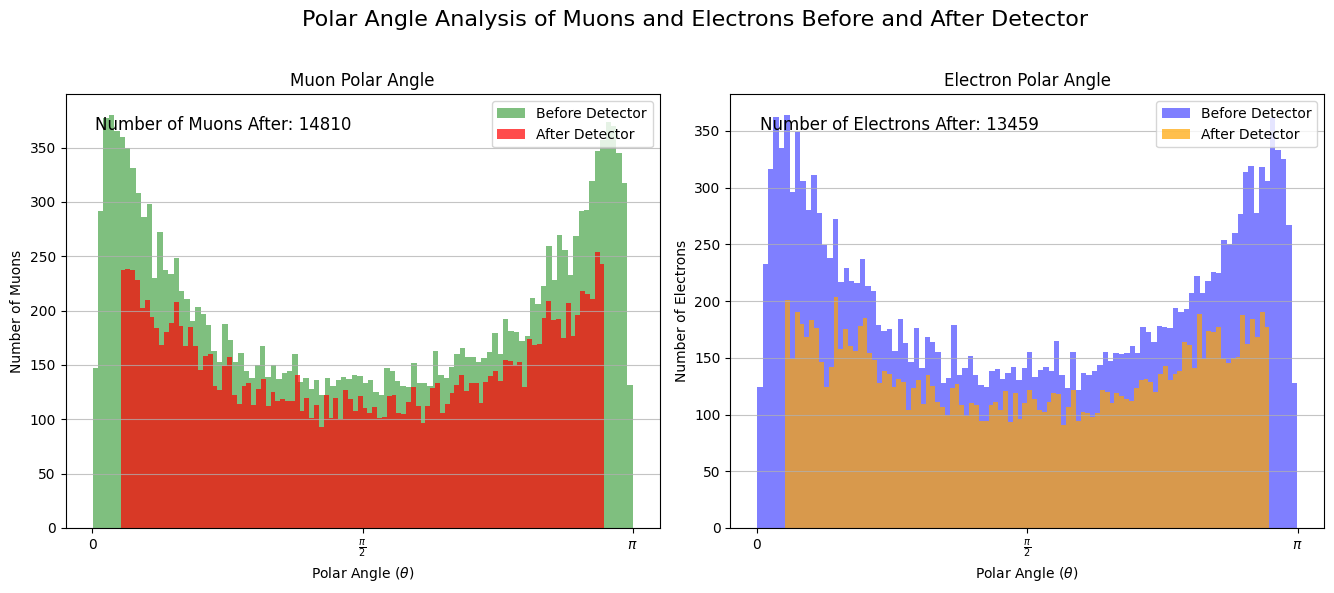

In [43]:
# Create subplots: 1 row, 2 columns (for pseudorapidity histograms)
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Overall title
plt.suptitle('Polar Angle Analysis of Muons and Electrons Before and After Detector', fontsize=16)

pi_vals = np.arange(0, np.pi + 0.1, np.pi / 2)
pi_labels = [r'$0$', r'$\frac{\pi}{2}$', r'$\pi$']

# --- Muon Pseudorapidity Histogram ---
axs[0].hist(muon_theta_before, bins=100, alpha=0.5, color='green', label='Before Detector')
axs[0].hist(muon_theta_after, bins=100, alpha=0.7, color='red', label='After Detector')
axs[0].set_xlabel(r'Polar Angle ($\theta$)')
axs[0].set_ylabel('Number of Muons')
axs[0].set_title('Muon Polar Angle')
axs[0].grid(axis='y', alpha=0.75)
axs[0].set_xticks(pi_vals)
axs[0].set_xticklabels(pi_labels)
# Add legend and text with the number of muons
axs[0].legend(loc='upper right')
num_muons = len(muon_eta_after)
axs[0].text(0.05, 0.95, f'Number of Muons After: {num_muons}', 
            ha='left', va='top', fontsize=12, transform=axs[0].transAxes)

# --- Electron Pseudorapidity Histogram ---
axs[1].hist(electron_theta_before, bins=100, alpha=0.5, color='blue', label='Before Detector')
axs[1].hist(electron_theta_after, bins=100, alpha=0.7, color='orange', label='After Detector')
axs[1].set_xlabel(r'Polar Angle ($\theta$)')
axs[1].set_ylabel('Number of Electrons')
axs[1].set_title('Electron Polar Angle')
axs[1].grid(axis='y', alpha=0.75)
axs[1].set_xticks(pi_vals)
axs[1].set_xticklabels(pi_labels)
# Add legend and text with the number of electrons
axs[1].legend(loc='upper right')
num_electrons = len(electron_eta_after)
axs[1].text(0.05, 0.95, f'Number of Electrons After: {num_electrons}', 
            ha='left', va='top', fontsize=12, transform=axs[1].transAxes)

# Show the plot
plt.tight_layout(rect=[0, 0, 0.96, 0.96])  # Adjust layout to make room for the overall title
save_path = r"C:\Users\gabri\OneDrive\Documents\University\Mphys\TriBoson\Week4\Plots\muon_electron_polar_angle_analysis.png"
plt.savefig(save_path, dpi=300) 
plt.show()
